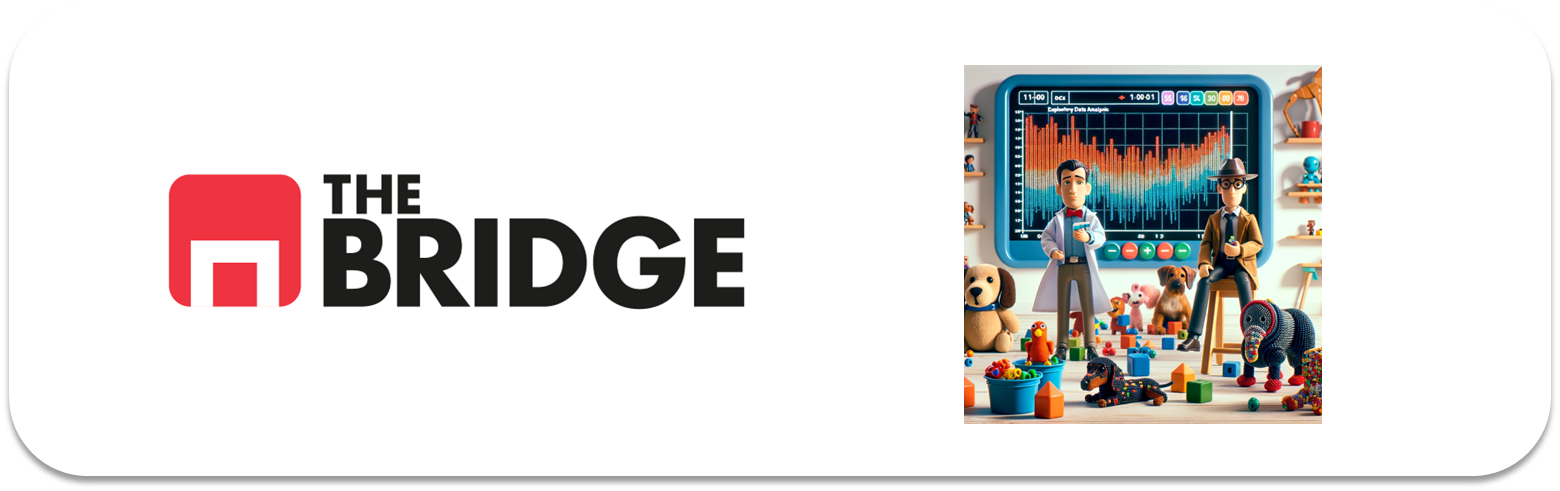

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df = pd.read_csv('./data/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic = df.drop(['deck', 'survived', 'pclass', 'embarked'], axis=1)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic['family_members'] = df_titanic['sibsp'] + df_titanic['parch']
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
df_titanic['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [7]:
df_titanic['embark_town'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: embark_town, Length: 891, dtype: bool

In [8]:
df_titanic['embark_town'] = [df_titanic['embark_town'].mode()[0] if pd.isna(i) else i for i in df_titanic['embark_town']]

In [9]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     891 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:
df_titanic.age.groupby(df_titanic['who']).mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [11]:
df_titanic['age'] = df_titanic.groupby('who')['age'].transform(lambda x: x.fillna(x.mean()))


In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     891 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?


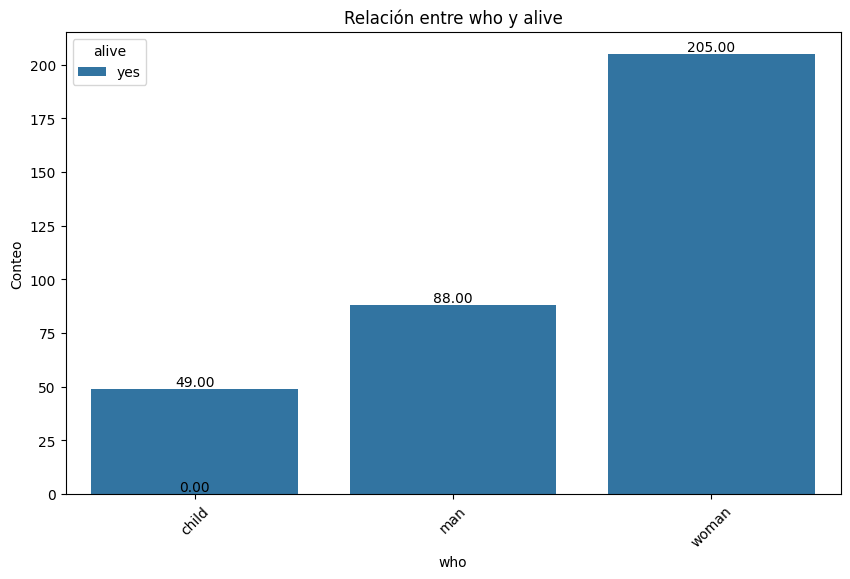

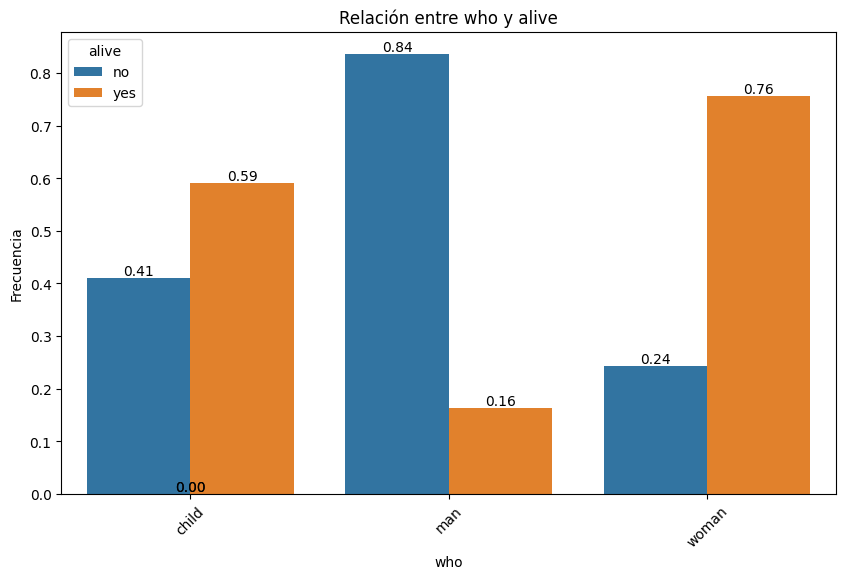

In [19]:
plot_categorical_relationship_fin(df_titanic[df_titanic.alive == 'yes'], 'who', 'alive', show_values=True)
plot_categorical_relationship_fin(df_titanic, 'who', 'alive', True, True)

In [32]:
df_titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [22]:
# Relación estadísticamente significativa sexo-supervivencia: test chi2
from scipy.stats import chi2_contingency
tabla_contingencia = pd.crosstab(df_titanic.sex, df_titanic.alive)
chi, p, dof, expect = chi2_contingency(tabla_contingencia)
print(f'''Chi: {chi}
p-valor: {p}
dof: {dof}
Tabla de frecuencias esperadas: 
{expect}
      ''')

Chi: 260.71702016732104
p-valor: 1.1973570627755645e-58
dof: 1
Tabla de frecuencias esperadas: 
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
      


> Sí existe una relación significativa estadísitcamente entre el sexo del pasajero y su supuervivencia

In [35]:
df_titanic['adulthood'] = ['child' if df_titanic.who[i] == 'child' else 'adult'for i in range(len(df_titanic))]

In [40]:
# Relación estadísticamente significativa edad-supervivencia: test chi2
from scipy.stats import chi2_contingency

tabla_contingencia = pd.crosstab(df_titanic.adulthood, df_titanic.alive)
chi, p, dof, expect = chi2_contingency(tabla_contingencia)
print(f'''Chi: {chi}
p-valor: {p}
dof: {dof}
Tabla de frecuencias esperadas: 
{expect}
      ''')

Chi: 15.556993340077092
p-valor: 8.005497211300105e-05
dof: 1
Tabla de frecuencias esperadas: 
[[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]
      


> Sí existe una relación significativa estadísitcamente entre si el pasajero era o no adulto y su supuervivencia

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

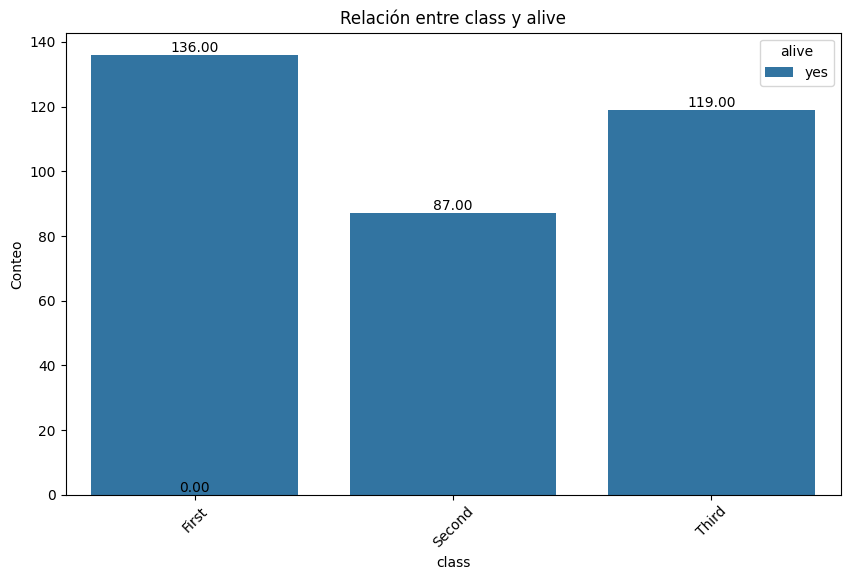

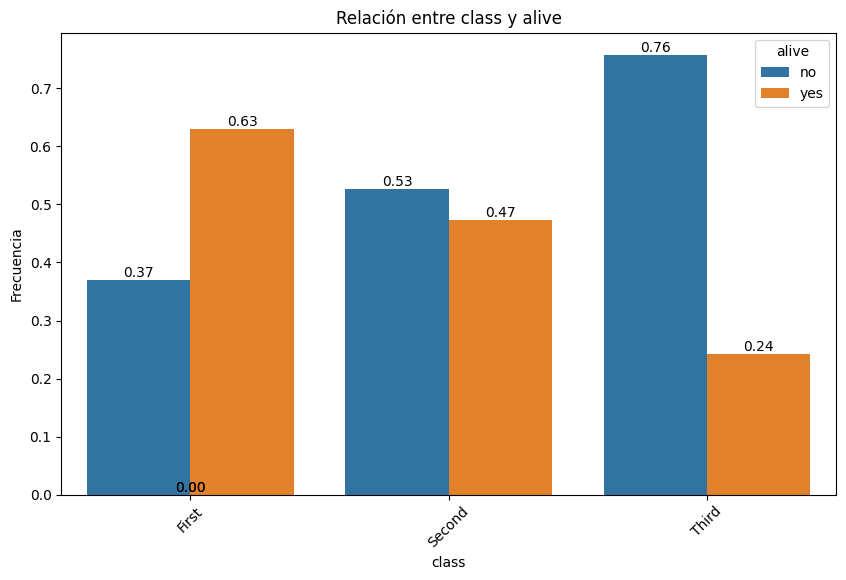

In [46]:
plot_categorical_relationship_fin(df_titanic[df_titanic.alive == 'yes'], 'class', 'alive', show_values=True)
plot_categorical_relationship_fin(df_titanic, 'class', 'alive', True, show_values=True)

In [47]:
# Test chi2
tabla_contingencia = pd.crosstab(df_titanic['class'], df_titanic.alive)
chi, p, dof, expect = chi2_contingency(tabla_contingencia)
tabla_contingencia = pd.crosstab(df_titanic.adulthood, df_titanic.alive)
chi, p, dof, expect = chi2_contingency(tabla_contingencia)
print(f'''Chi: {chi}
p-valor: {p}
dof: {dof}
Tabla de frecuencias esperadas: 
{expect}
      ''')

Chi: 15.556993340077092
p-valor: 8.005497211300105e-05
dof: 1
Tabla de frecuencias esperadas: 
[[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]
      


> Sí existe una relación significativa estadísitcamente entre la clase en la que viajaba el pasajero y su supuervivencia

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

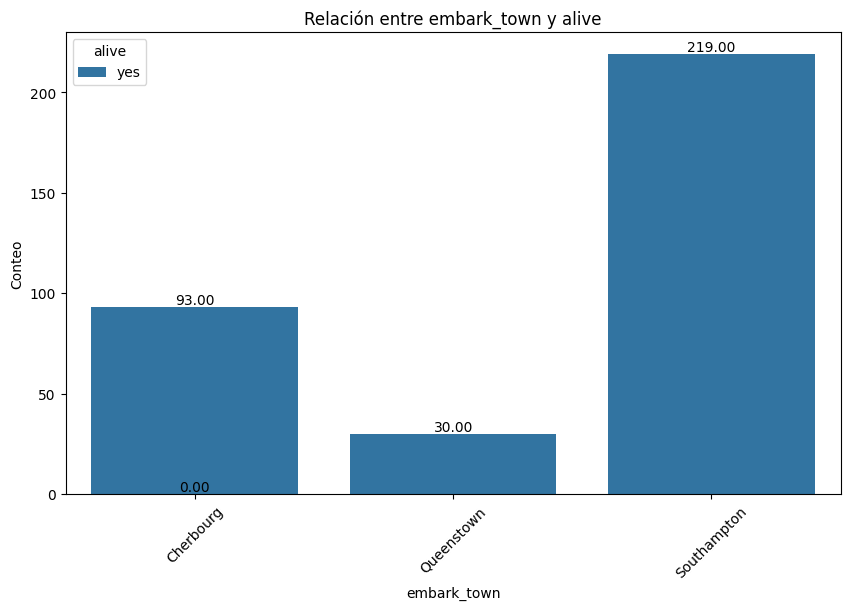

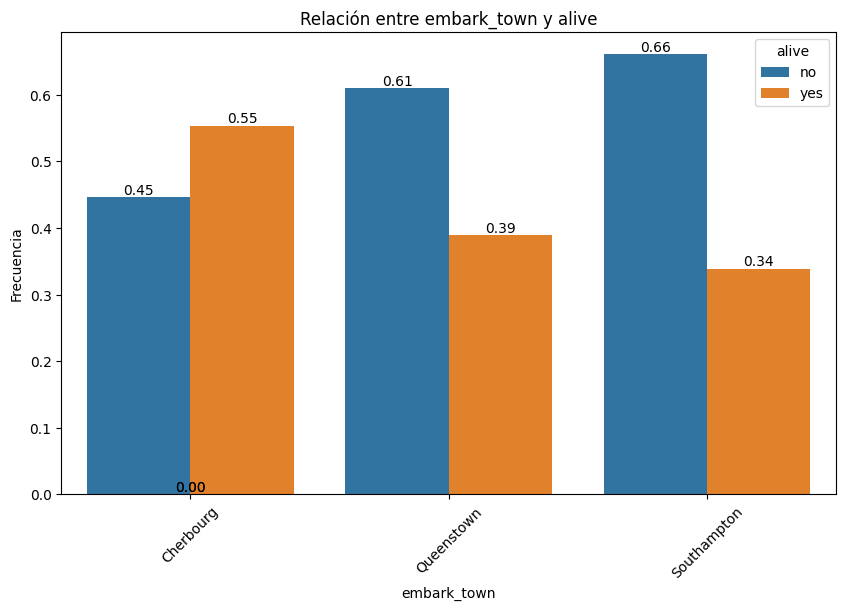

In [50]:
plot_categorical_relationship_fin(df_titanic[df_titanic.alive == 'yes'], 'embark_town', 'alive', show_values=True)
plot_categorical_relationship_fin(df_titanic, 'embark_town', 'alive', True, show_values=True)

In [52]:
# Test chi2
tabla_contingencia = pd.crosstab(df_titanic.embark_town, df_titanic.alive)
chi, p, dof, expect = chi2_contingency(tabla_contingencia)
print(f'''Chi: {chi}
p-valor: {p}
dof: {dof}
Tabla de frecuencias esperadas: 
{expect}
      ''')

Chi: 25.964452881874784
p-valor: 2.3008626481449577e-06
dof: 2
Tabla de frecuencias esperadas: 
[[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]
      


> Sí existe una relación significativa estadísitcamente entre el puerto en el que embarcó el pasajero y su supuervivencia

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

(2,)


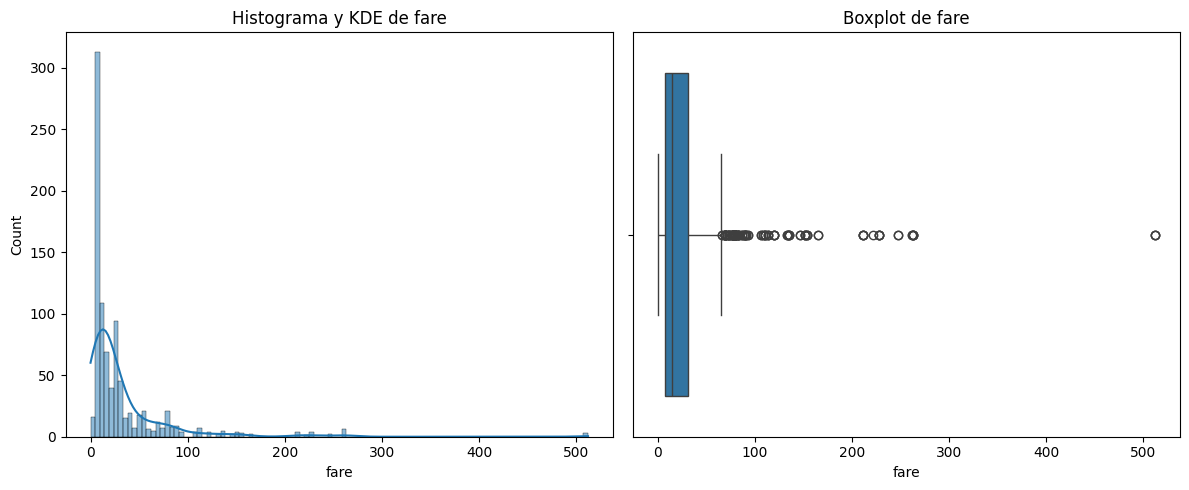

In [55]:
plot_combined_graphs(df_titanic, ['fare'])

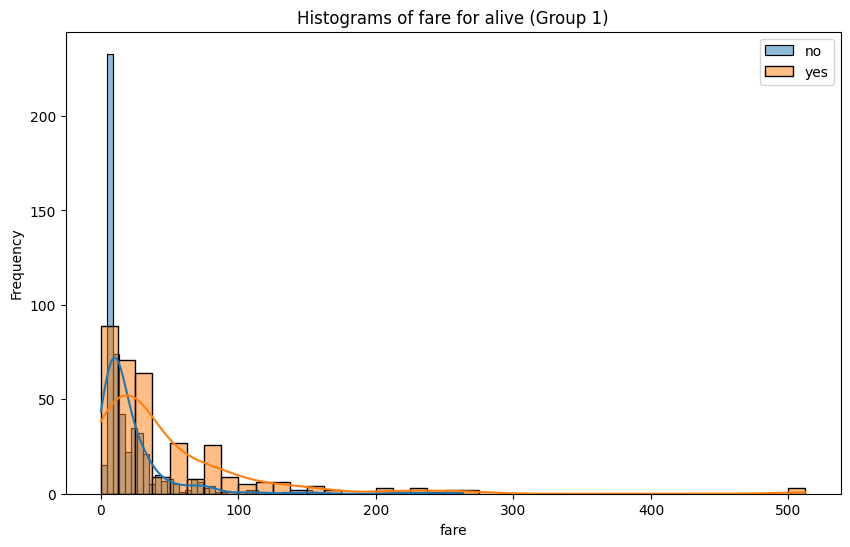

In [60]:
plot_grouped_histograms(df_titanic, cat_col='alive', num_col='fare', group_size=2)

> La relación parece ser que llegado a un punto del precio del pasaje, es mayor la probabilidad de que sobreviva el pasajero, por tanto, precio y supervivencia se relacionan de manera que a mayor precio, mayor supervivencia

In [61]:
# Aplicamos la prueba U de Mann-Whitney para evaluar si hay relación significativa entre precio y superviviencia
from scipy.stats import mannwhitneyu
grupo_a = df_titanic.loc[df_titanic.alive == 'yes']['fare']
grupo_b = df_titanic.loc[df_titanic.alive == 'no']['fare']
u_stat, p_value = mannwhitneyu(grupo_a, grupo_b)
print(f'''
"Estadístico U: {u_stat}
"Valor p: {p_value})
''')


"Estadístico U: 129951.5
"Valor p: 4.553477179250237e-22)



> Esto rechaza la hipótesis de que la media de precio del billete no fuera estadísticamente distinta entre los que sobrevivieron y los que no

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [63]:
df[df.fare == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


> Mirándolo en el df original, pareciera que falta ese dato, porque otros campos del pasajero no figuran o, una segunda hipótesis, la de los únicos dos de los que sí se dispone información, pudiera ser que fueran altos puestos de la tripulación, o de la sociedad, porque viajaban en primera. Igualmente el resto pudieran ser otros trabajadores de a bordo, porque todos son hombres jóvenes que embarcaron en Southampton y la clase en la que viajaban varía entre las tres clases. No obstante solo sobrevivió uno de ellos.

In [66]:
df_titanic.iloc[df_titanic.fare.argmax()]

sex                  female
age                    35.0
sibsp                     0
parch                     0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
adulthood             adult
Name: 258, dtype: object

> La pasajera que más pagó era una mujer que viajaba sola, y sobrevivió

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [153]:
grupos = df_titanic['embark_town'].unique()  # Obtener los valores únicos de la columna categórica
fare_embark_town = [df_titanic[df_titanic['embark_town'] == grupo]['fare'] for grupo in grupos] # obtenemos el precio por ciudad

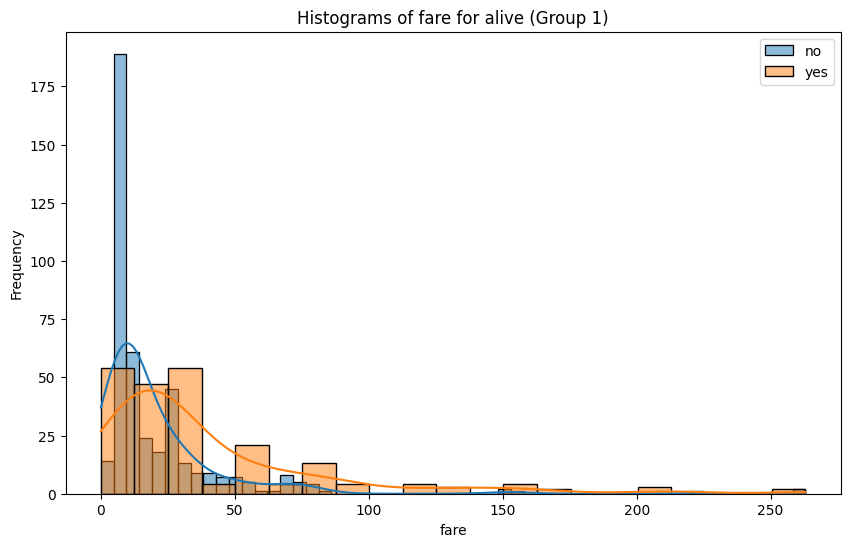

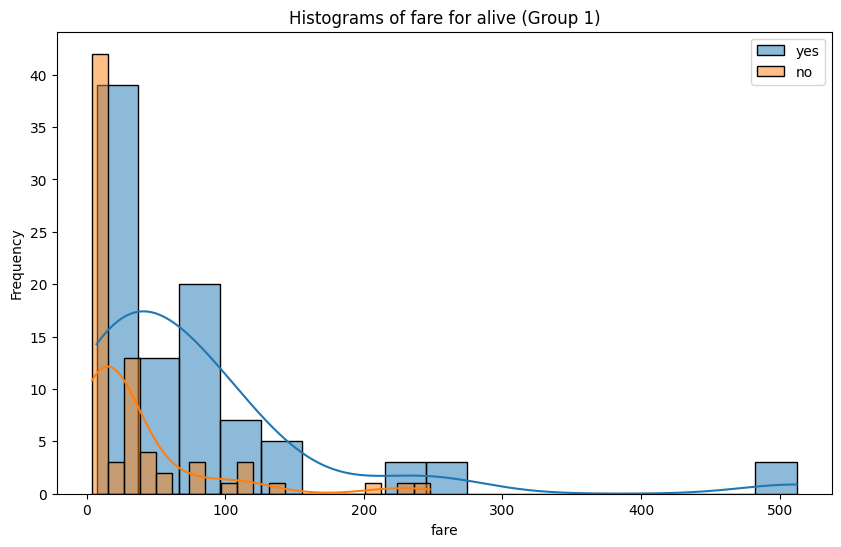

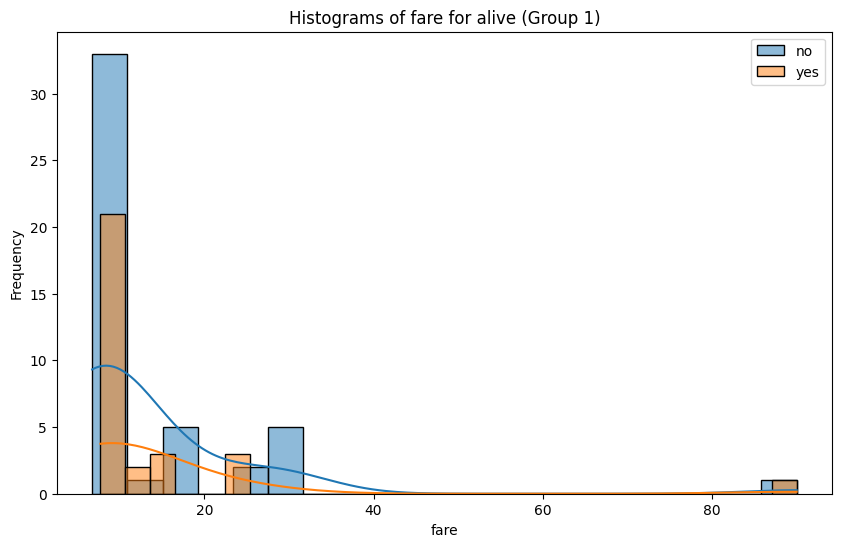

In [80]:
plot_grouped_histograms(df_titanic[df_titanic.embark_town == 'Southampton'], 'alive', 'fare', 2) #Southapmton
plot_grouped_histograms(df_titanic[df_titanic.embark_town == 'Cherbourg'], 'alive', 'fare', 2) #Cherbourg
plot_grouped_histograms(df_titanic[df_titanic.embark_town == 'Queenstown'], 'alive', 'fare', 2) #Queenstown

>Parece que los pasajeros que pagaron más caros los pasajes solían venir de Cherbourg, luego de Southapmton y por último de Queenstown, y en base a la frecuencia de la variable precio del pasaje es que se relaciona el ratio de fallecidos en cada puerto. No parece haber grandes diferencias en cuanto a esta distribución fallecidos/supervivientes 

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [ ]:
# Tabla de contingencia edad - clase sobre el grupo de pasajeros supervivientes
df_alive = df_titanic[df_titanic.alive == 'yes']
tabla_contingencia = pd.crosstab(df_alive.sex, df_alive['class'])
tabla_contingencia

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [83]:
tabla_contingencia_base = pd.crosstab(df_titanic.sex, df_titanic['class'])
tabla_contingencia_base

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [84]:
tabla_contingencia/tabla_contingencia_base

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


> En términos absolutos, los que más sobrevivieron fueron los chicos de tercera clase. Sin embargo, en términos relativos, las mujeres de primera clase fueron las que más sobrevivieron  

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [88]:
columna_directora = 'alive'
col_1 = 'age'
col_2 = 'fare'
dicc_multivariante = {}
for valor in df_titanic[columna_directora].unique():
    dicc_multivariante[valor] = df_titanic.loc[df_titanic[columna_directora] == valor, [col_1, col_2]]

¿Sobrevivieron? no


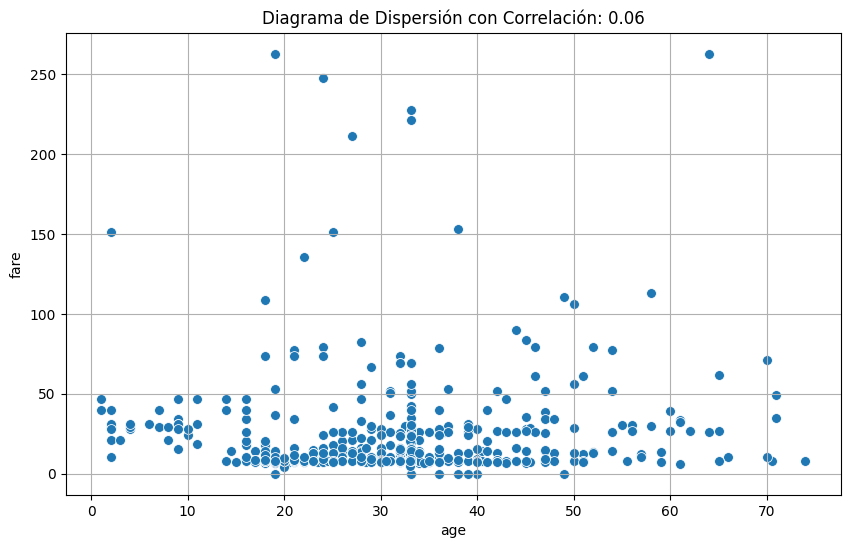

¿Sobrevivieron? yes


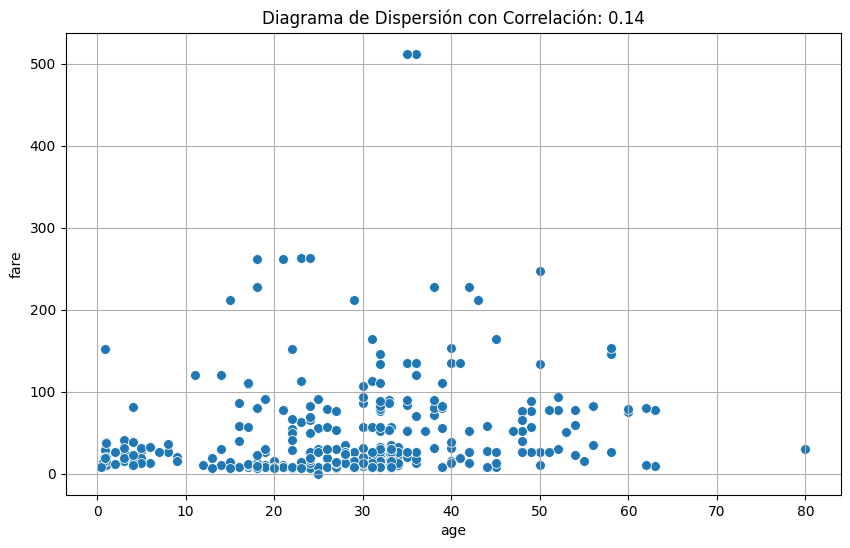

In [89]:
for valor, df_datos in dicc_multivariante.items():
    print(f'¿Sobrevivieron? {valor}')
    grafico_dispersion_con_correlacion(df_datos, columna_x=col_1, columna_y=col_2, mostrar_correlacion=True)

1. Apenas hay correlación entre la edad y la tasa que pagaron los tripulantes, aunque de haberla, esta es positiva, es decir, a mayor edad mayor precio pagado por el billete
1. Se puede apreciar que la edad fue relevante en la supervivencia pues, como se ve en la segunda gráfica, los puntos se concentran en la mitad más joven y a partir de los 60 prácticamente no sobreviven pasajeros
1. Tambien parece haber una ligera relación entre la tasa pagada y la probabilidad de fallecimiento pues, tomando la línea de los 50$ como referencia, se aprecian más puntos en la gráfica del sí que en la del no. 

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

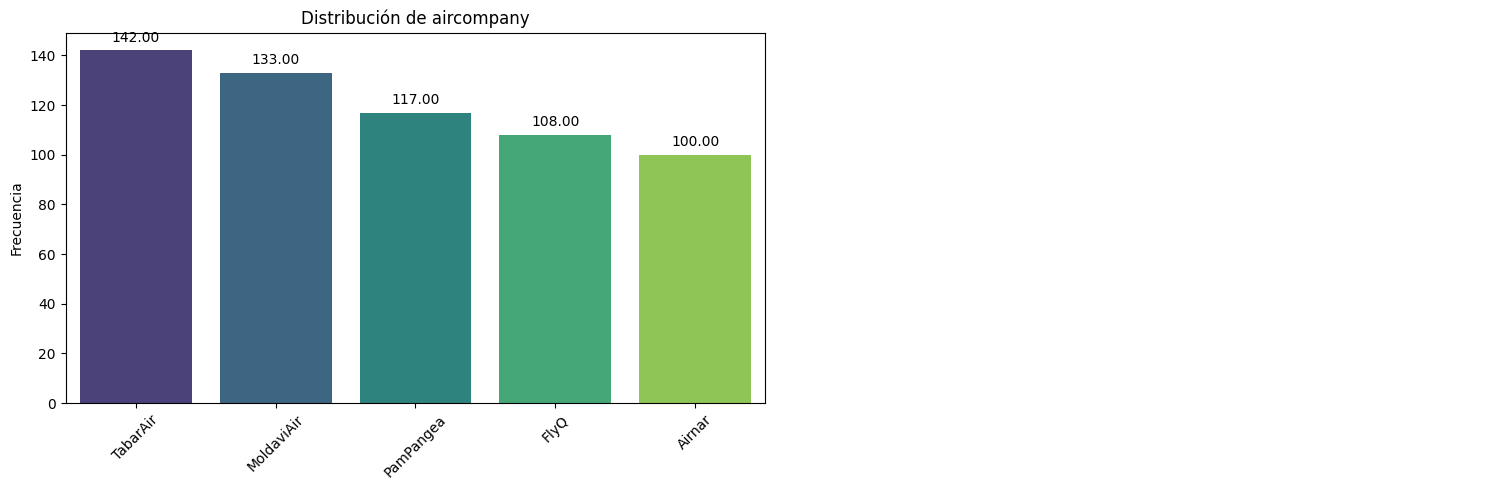

In [146]:
df_air_jun = pd.read_csv('./data/dataset_viajes_jun23.csv')
pinta_distribucion_categoricas(df_air_jun, ['aircompany'], mostrar_valores=True)

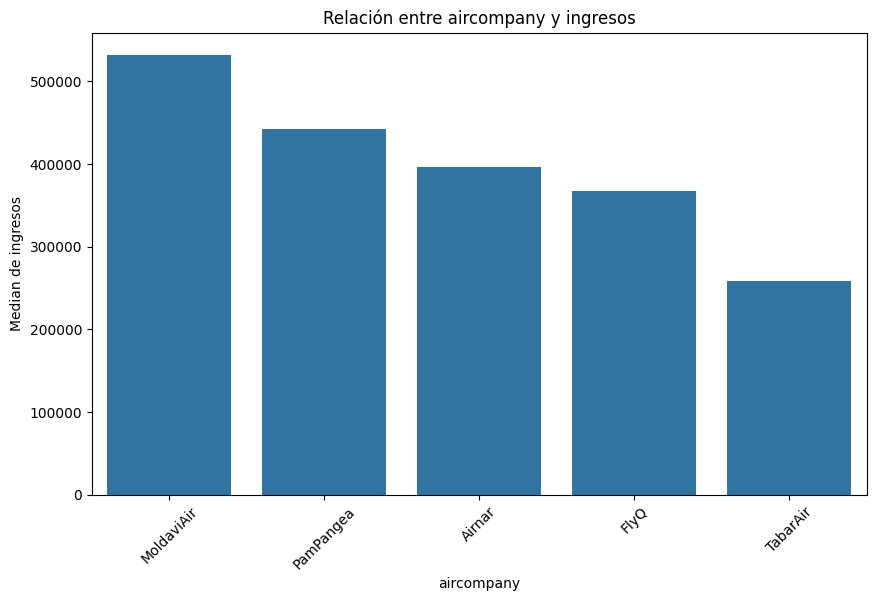

In [97]:
# Usábamos la mediana porque los ingresos no se distribuían normalmente, sino que la mediana estaba desplazada a la izquierda
plot_categorical_numerical_relationship(df_air_jun, 'aircompany', 'ingresos', measure='median')

> Llama la atención que, a pesar de ser la companía que más viajes realiza, es la que menos ingresos obtiene

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

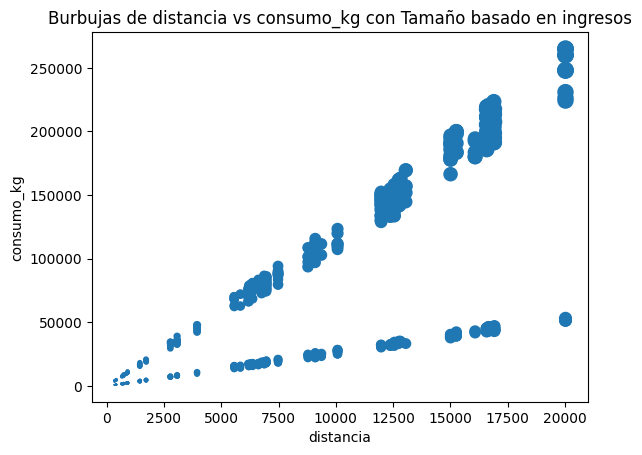

In [98]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 10000)

>Parece haber una línea de vuelos que está haciendo las distancias cortas, medias y largas como las hace el resto de companías, solo que más eficientemente en cuanto a consumo, pero según parece también a menor precio.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


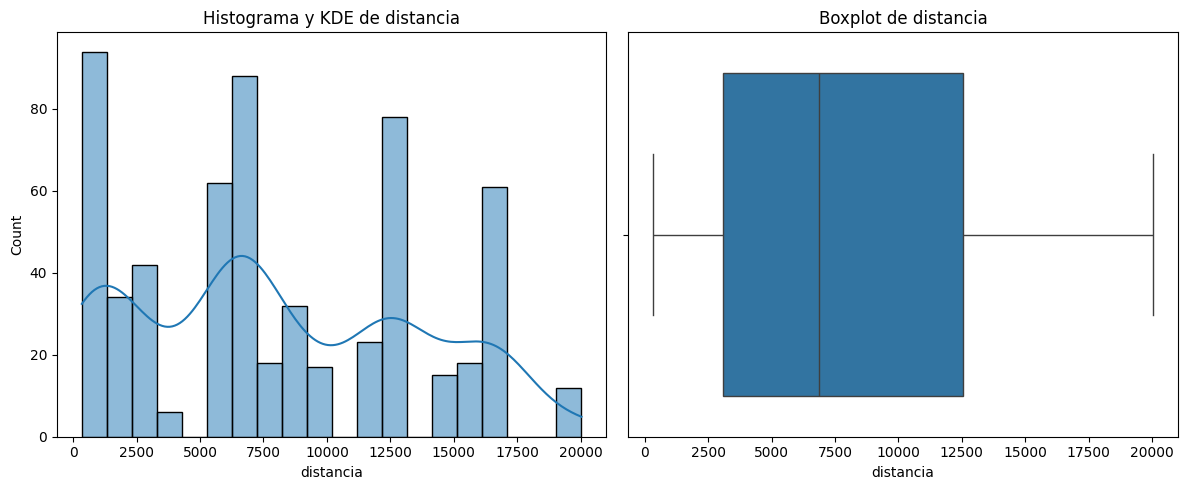

In [ ]:
# Distribución valores de 'distancia'
plot_combined_graphs(df_air_jun, ['distancia'], bins=20)

>Los separadores de las categorías serán 5000, 11000 y 13500

In [148]:
for i in df_air_jun.index:
    if df_air_jun.loc[i, 'distancia'] > 13500:
        df_air_jun.loc[i, 'cat_vuelo'] = 'MLD'
    elif df_air_jun.loc[i, 'distancia'] > 11000:
        df_air_jun.loc[i, 'cat_vuelo'] = 'LD'
    elif df_air_jun.loc[i, 'distancia'] > 5000:
        df_air_jun.loc[i, 'cat_vuelo'] = 'MD'
    else:
        df_air_jun.loc[i, 'cat_vuelo'] = 'CD'

In [150]:
columna_directora = 'cat_vuelo'
col_1 = 'ingresos'
col_2 = 'consumo_kg'
dicc_multivariante = {}
for valor in df_air_jun[columna_directora].unique():
    dicc_multivariante[valor] = df_air_jun.loc[df_air_jun[columna_directora] == valor, [col_1, col_2]]


Categoría de vuelo: CD


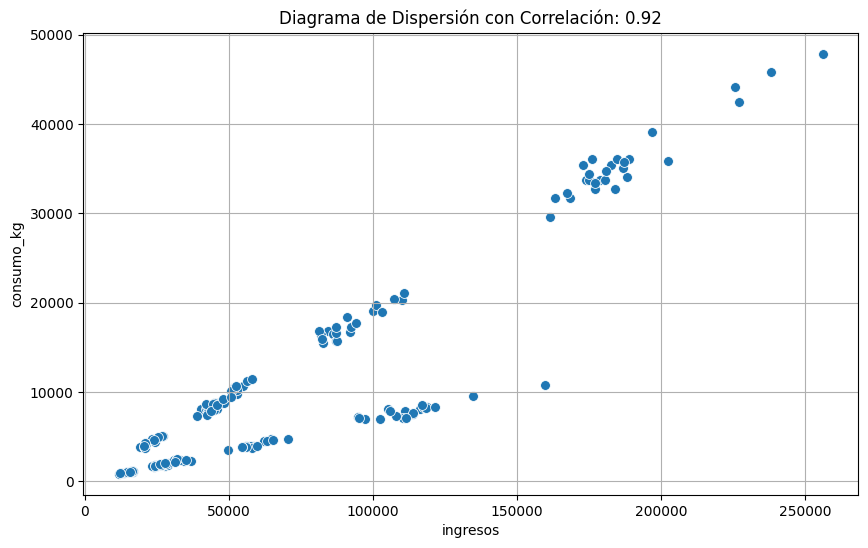

Categoría de vuelo: LD


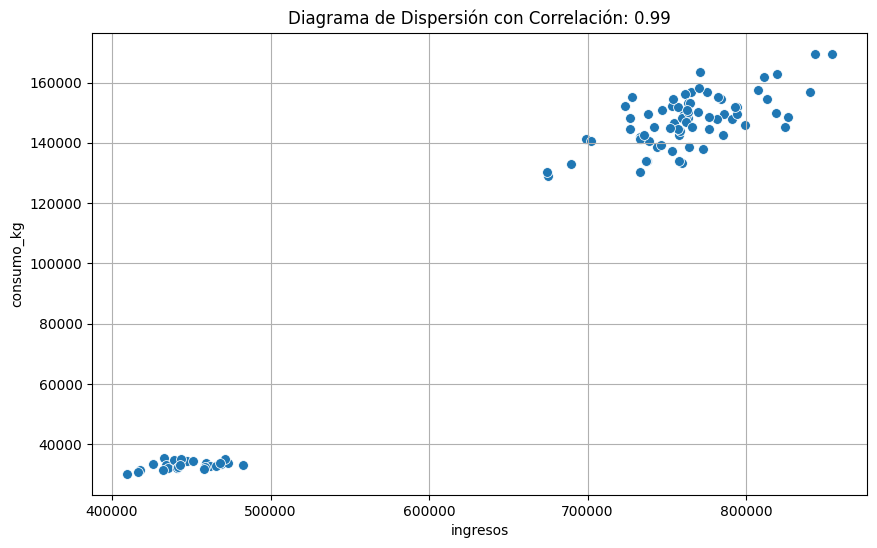

Categoría de vuelo: MD


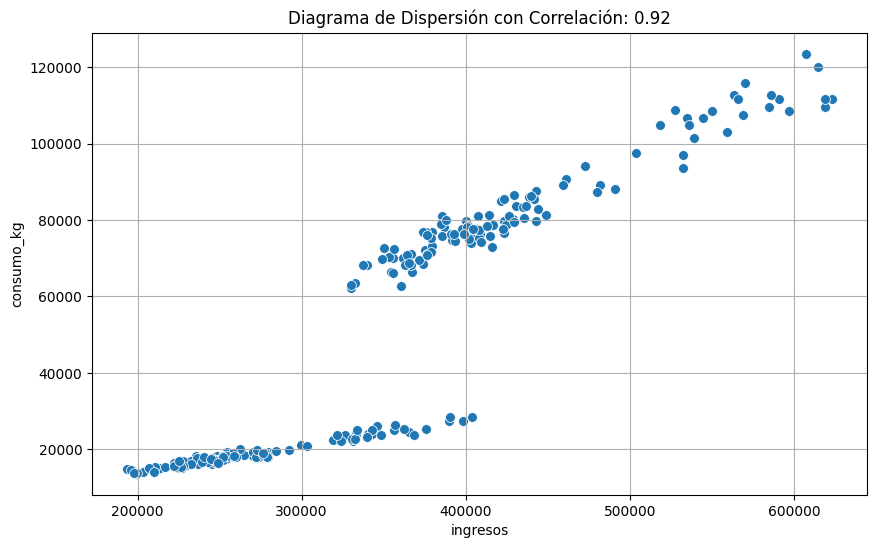

Categoría de vuelo: MLD


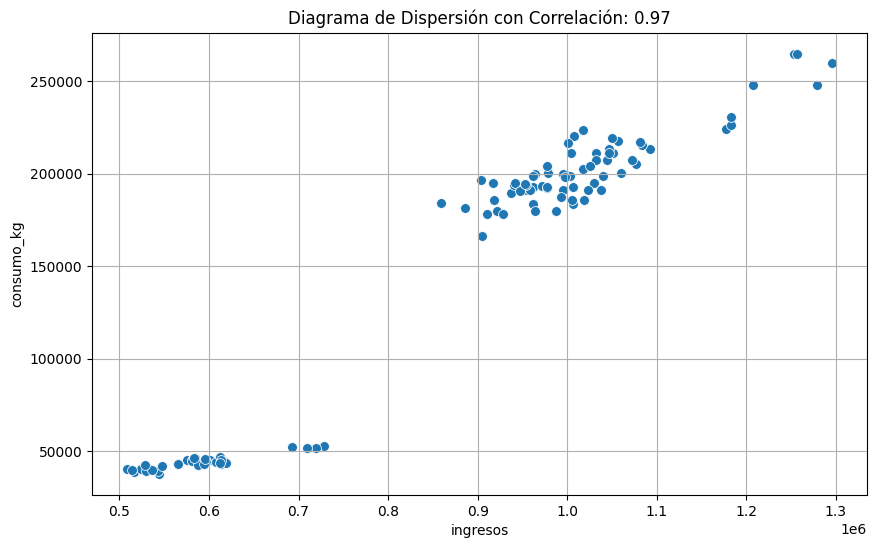

In [152]:
for valor, df in dicc_multivariante.items():
    print(f'Categoría de vuelo: {valor}')
    grafico_dispersion_con_correlacion(df, columna_x=col_1, columna_y=col_2, mostrar_correlacion=True)

>Hay una fuerte correlación, lineal y positiva, entre los ingresos y el consumo. Esto es lo mismo que decir que a mayor consumo mayor ingreso, lo cual tiene sentido: una empresa que tiene mayor gasto debido al consumo de combustible, repercutirá este en el billete, esos vuelos ingresarán más, pero porque son más costosos, tanto para el cliente como para la compañía aérea al ejecutarlos. 

> Esto no quiere decir que los que consiguen que el vuelo sea más eficiente obtengan menos beneficio, pero sí que pueden cobrar un billete más económico. 

> En un análisis posterior, podríamos ver si esa ventaja en eficencia se logra traducir en la estructura de costes y, aunque ingresen menos, los beneficios se igual o mejoran los de la competencia. De no ser así, podría ser recomendable que la Tabarair iguale un poco más el precio del billete a los de la competencia

> Otra hipótesis podría ser que no fuese más eficiente en igualdad de codiciones, si no que el menor consumo se deba a que la aeronave que usan es más pequeña. El ingreso sería menor, por cargar a un menor número de pasajeros, no porque el pasaje se esté cobrando por debajo del mercado.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.